# Daegu Real Estate

[Sumber data Daegu Real Estate](https://www.kaggle.com/datasets/gunhee/koreahousedata/code)

## **Contents**
1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## 1. Business Problem Understanding

**Context**

**Sale Price**

Sebuah real estate di Daegu, Korea Selatan ingin mengetahui apa yang menyebabkan perubahan harga apartemen di Daegu. Perubahan harga apartemen disebabkan oleh hal-hal berikut:
    - Lokasi apartemen terhadap transportasi umum
    - Fasilitas yang tersedia di apartemen dan di sekitarnya
    - Ukuran apartemen
    - dll

Dari fitur-fitur tersebut diharapkan, dapat ditemukan pola yang dapat digunakan untuk memprediksi harga pasaran apartemen.

**Content**
- Data didapat dari API data.go.kr dengan tempo waktu antara Aug/2007 ~ Aug/2017
- Data yang didapat hanya berdasarkan 1 daerah saja yakni, Daebong strict, Daegu city, South Korea.


**Problem Statement**

Dalam pemasaran apartemen, harga apartemen harus disesuaikan dengan keinginan penghuni baru dan menguntungkan secara finansial untuk real esate teresebut. Harga apartemen yang diberikan ditentukan secara bebas oleh pemilik apartemen sehingga, dari petunjuk minimal real estate, diharapkan pemilik dapat menentukan harga apartemen yang sesuai. Maka dari itu, **dengan berjalannya waktu, penghuni baru dengan keingingan baru semakin bertambah sehingga, menentukan harga yang kompetitif sangat penting.**



**Goals**

Dari problem statement di atas, Daegu real estate membutuhkan 'alat' yang membantu mereka memprediksi harga yang pantas untuk membantu klien mereka dalam **menentukan harga apartemen**. Harga apartemen akan disesuaikan berdasarkan fitur-fitur yang terdapat seperti, jarak terhadap transportasi umum, fasilitas dalam dan disekitar apartemen dan ukuran apartemen, tipe apartemen. Diharapkan keakuratan properti dapat memprediksi harga yang sesuai untuk memberikan profit.

**Analytic Approach**

Analisis data akan dilakukan dengan menemukan pola yang terdapat dalam fitur-fitur yang membedakan tiap-tiap apartemen. Lalu, akan dibentuk suatu model regresi untuk membuat 'alat' yang membantu real estate memprediksi harga yang sesuai untuk memnentukan harga apartemen tersebut.

**Metric Evaluation**

RMSE, MAE, dan MAPE adalah evaluasi metrik yang akan digunakan di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin mendekati 0 nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi harga sewa sesuai dengan limitasi fitur yang digunakan. 

Selain itu, kita juga bisa menggunakan nilai R2 score atau adj. R-squared jika model yang nanti terpilih sebagai final model adalah model linear. Nilai R-squared digunakan untuk mengetahui seberapa baik model dapat merepresentasikan varians keseluruhan data. Semakin mendekati 1, maka semakin fit pula modelnya terhadap data observasi. Namun, metrik ini tidak valid untuk model non-linear.

## 2. **Data Understanding**

- Dataset merupakan data listing dari real estate di Daegu pada tahun Aug/2007 ~ Aug/2017

Feature:

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
|HallwayType|Object|Jenis lorong
TimeToSubway|Object| Jarak waktu menuju stasiun
SubwayStation|Object|Nama stasiun
N_FacilitiesNearBy(ETC)|Float| Jumlah fasilitas(etc) di sekitar apartemen
N_FacilitiesNearBy(PublicOffice)|Float|Jumlah fasilitas(Perkantoran) di sekitar apartemen
N_SchoolNearBy(University)|Float|Jumlah universitas di sekitar apartemen
N_Parkinglot(Basement)|Float| Jumlah tempat parkir(basement)
YearBuilt|Integer| Tahun pembangunan
N_FacilitiesInApt|Integer| Jumlah fasilitas apartemen
Size(sqf)|Integer| Ukuran apartemen(sqf)

Target:
- SalePrice

In [210]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
df.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


### Exploratory Data Analysis

In [211]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')


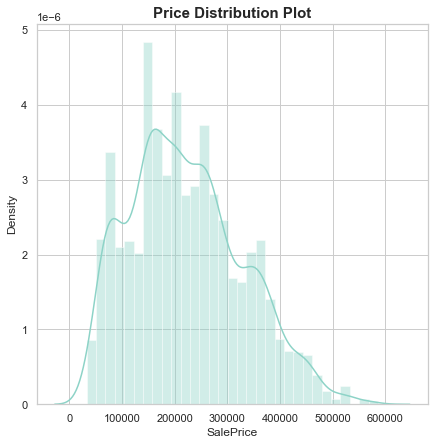

In [212]:
# Plot distribusi fitur 'sale price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('Price Distribution Plot', size=15, weight='bold');

Plot distribusi di atas menunjukan harga apartamen yang disewakan berbentuk 'skewed-right'. 

**Fitur-Fitur yang mempengaruhi harga**

In [213]:
# Cek jumlah properti berdasarkan stasiun terderkat dan tipe lorong
print(f"Jumlah properti berdasarkan stasiun terdekat:\n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah tiap tipe lorong apartemen properti:\n{df['HallwayType'].value_counts()}")

Jumlah properti berdasarkan stasiun terdekat:
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Jumlah tiap tipe lorong apartemen properti:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Kebanyakan properti berada di dekat Kyungbuk Uni Hospital dengan mayoritas jenis lorong adalah lorong berteras.

In [214]:
# Grouping tipe properti berdasarkan neighbourhood group
df.groupby(['SubwayStation', 'HallwayType'])['HallwayType'].count().to_frame()

HallwayType
SubwayStation         HallwayType             
Bangoge               mixed                502
Banwoldang            corridor              50
                      terraced             479
Chil-sung-market      mixed                 74
Daegu                 corridor              51
                      terraced              14
Kyungbuk_uni_hospital corridor              49
                      terraced            1103
Myung-duk             corridor             222
                      mixed                555
                      terraced             267
Sin-nam               corridor              51
                      terraced             416
no_subway_nearby      corridor              41
                      terraced             249

In [215]:
# Cek median price untuk tiap stasiun 
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0


In [216]:
# Cek median tiap jenis hallway pada setiap lokasi properti
type_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
type_pivot = type_pivot.fillna(0).sort_values(['corridor','mixed','terraced'])
display(type_pivot)

px.bar(
    type_pivot,
    title = 'Barplot Median Harga Apartemen Berdasarkan Lokasi Stasiun dan Jenis Lorong')


HallwayType,corridor,mixed,terraced
SubwayStation,,,
Chil-sung-market,0.0,88495.0,0.0
Bangoge,0.0,167035.0,0.0
no_subway_nearby,58407.0,0.0,243362.0
Myung-duk,65486.0,149557.0,271681.0
Daegu,70796.0,0.0,300884.0
Sin-nam,87610.0,0.0,256637.0
Banwoldang,101769.0,0.0,337168.0
Kyungbuk_uni_hospital,163716.0,0.0,244911.0


Ditemukan mayoritas jenis hallway yang dipilih adalah 'terraced' sementara yang paling sedikit adalah jenis hallway 'mixed'. Properti dengan media tertinggi berada di Myung-duk

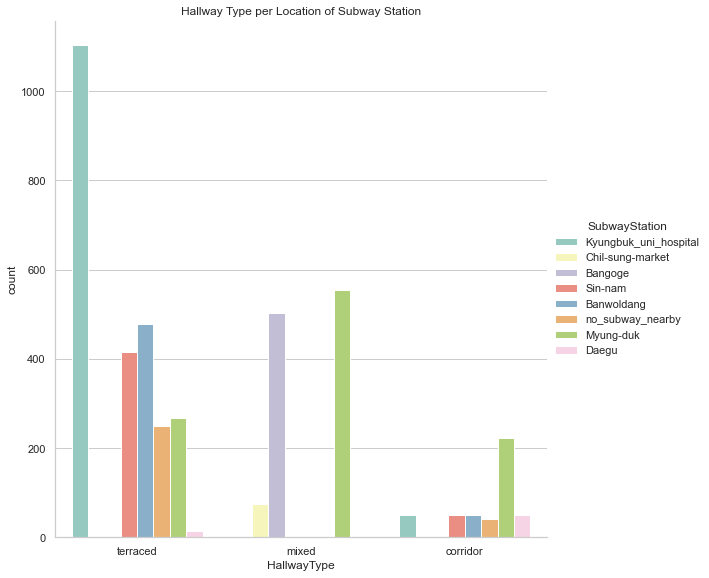

In [217]:
# Persebaran tipe hallway berdasarkan lokasi stasiun
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df, aspect = 1, height=8);
plt.title('Hallway Type per Location of Subway Station');


Kebanyakan apartemen berteras berada di Kyungbuk Uni Hospital dan mayoritas apartemen dengan lorong koridor dan berteras terdapat di Myung-duk. Hal ini dapat menjadi indikasi 
preferensi yang menyewa di mana kebanyakan lebih menyukai apartemen berteras.

# 3. Data Preprocessing

Tahap ini dilakukan untuk membersihkan data yang agar dapat digunkan untuk analisis. 

Hal yang akan dilakukan adalah:

1. Drop fitur yang tidak berhubungan dengan tujuan dalam analisis data yang terkait
2. Drop data duplikat pada terdapat
3. *Missing Data* yang terdapat pada data akan dibersihkan sesuai dengan kebutuhan. Proses ini dapat dilakukan dengan men-drop fitur tersebut atau menimputasi dengan nilai yang cocok seusai dengan data lainnya.

 

In [218]:
df1 = df.copy()

In [219]:
df.shape

(4123, 11)

In [220]:
# Set DataFrame untuk melihat detail kolom
kolom=[]
unique=[]
nunique = []
for columns in df.columns:
    x = df[columns].unique()
    unique.append(x)

    y = df[columns].nunique()
    nunique.append(y)
    
    kolom.append(columns)

In [221]:
# Detail kolom dalam bentuk dataframe
pd.DataFrame({
    'feature':unique,
    'null': df1.isna().sum(),
    'n_feature':nunique
    
}).sort_values('n_feature')

,feature,null,n_feature
HallwayType,"[terraced, mixed, corridor]",0,3
N_FacilitiesNearBy(ETC),"[0.0, 1.0, 5.0, 2.0]",0,4
TimeToSubway,"[0-5min, 10min~15min, 15min~20min, 5min~10min,...",0,5
N_SchoolNearBy(University),"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]",0,6
SubwayStation,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang...",0,8
N_FacilitiesNearBy(PublicOffice),"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]",0,8
N_FacilitiesInApt,"[10, 4, 5, 7, 2, 9, 8, 1, 3]",0,9
YearBuilt,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199...",0,16
N_Parkinglot(Basement),"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0...",0,20
Size(sqf),"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11...",0,89


DataFrame di atas menunjukan fitur yang terdapat dan ditemukan tidak ada *missing data* yang harus diproses

## Drop Columns

Perlu dipertimbangkan dalam melakukan drop pada fitur yang dimiliki. Pertimbangan dimulai dari domain knowledge untuk memilih fitur apa yang tidaka ada hubungan dengan objective data analisis. 

- Dari domain knowledge, 'YearBuilt' tidak ada hubungan untuk analsis prediktif data, namun dapat digunakan untuk mencari suatu pola dengan fitur lainnya.

In [222]:
df1.shape

(4123, 11)

In [223]:
# Data duplikasi
df[df.duplicated()]

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
55,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,910,263345
56,terraced,0-5min,Banwoldang,0.0,0.0,0.0,203.0,2014,10,914,371681
122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,5.0,3.0,930.0,2013,7,644,149274
127,terraced,0-5min,Banwoldang,0.0,2.0,2.0,524.0,2007,4,1394,256637
133,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,644,168141
...,...,...,...,...,...,...,...,...,...,...,...
4113,terraced,5min~10min,Daegu,0.0,3.0,2.0,400.0,2015,7,644,300884
4114,corridor,10min~15min,Myung-duk,5.0,7.0,5.0,0.0,1992,3,355,86725
4115,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141


In [224]:
# Cek data duplikat
df1.duplicated().sum()

1422

In [225]:
# Drop duplikat
df1.drop_duplicates(inplace=True)

In [226]:
# Sisa data setelah duplikat di-drop
df1.shape

(2701, 11)

In [227]:
# Drop fitur 'YearBuilt'
df1.drop(columns = 'YearBuilt',inplace=True)

Ditemukan terdapat 1422 data duplikat, maka dari itu, data-data tersebut akan di-drop untuk mempermudah analisis data.

Fitur 'YearBuilt' tidak ada hubungan untuk analisa prediktif, namun berguna dalam mencari pola harga apartemen tiap tahunnya, maka fitur akan digunkan untuk mencari pola tersebut tapi di-drop untik analisa data

In [228]:
df1.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice
count,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000,2701.000000
mean,1.890411,4.027027,2.680489,533.746390,5.713439,984.028878,229511.365790
std,2.153168,1.887486,1.504470,418.224859,2.386552,391.982619,105079.891321
min,0.000000,0.000000,0.000000,0.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,4.000000,743.000000,153539.000000
50%,1.000000,4.000000,2.000000,536.000000,5.000000,910.000000,221238.000000
75%,5.000000,5.000000,4.000000,798.000000,7.000000,1167.000000,300884.000000
max,5.000000,7.000000,5.000000,1321.000000,10.000000,2337.000000,585840.000000


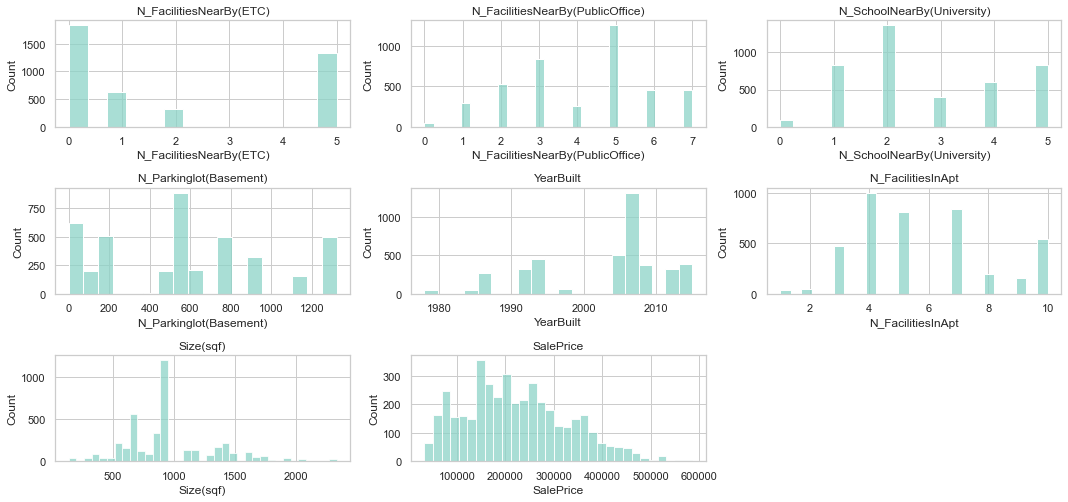

In [289]:
# Histplot untuk setiap fitur numerikal
numerical_columns = list(df.describe().columns)

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for columns in numerical_columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.histplot(x=columns, data=df);
    plt.title(columns, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

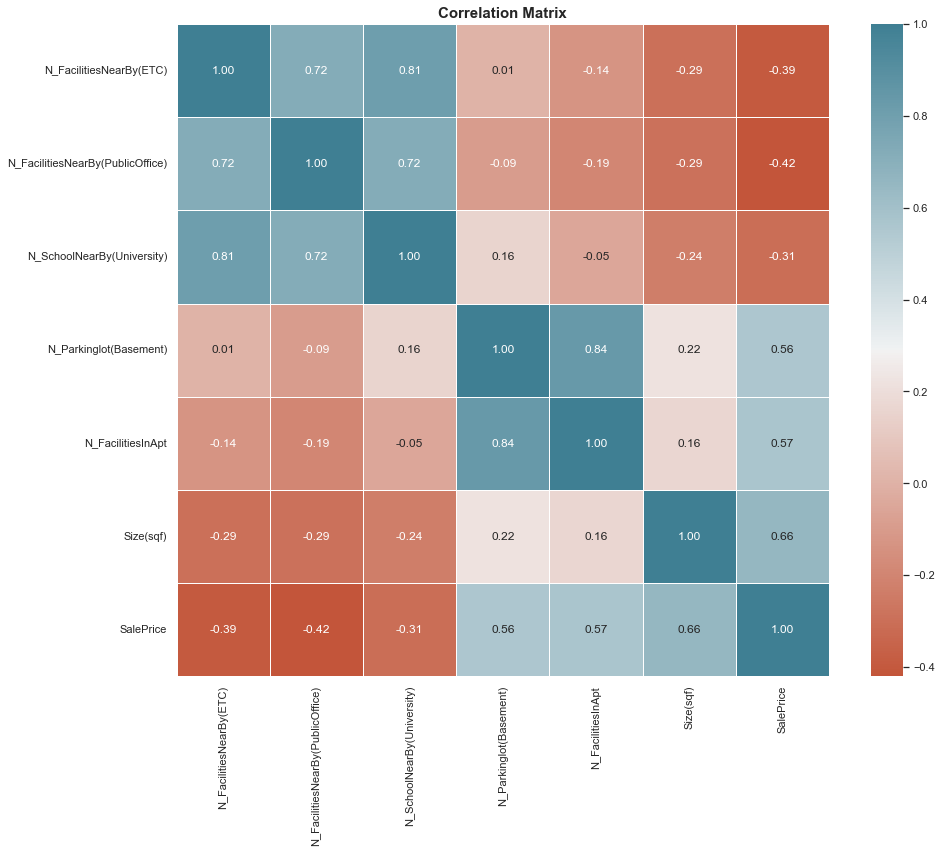

In [231]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df1.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Matrix korelasi di atas menunjukan terdapat hubungan **kuat pada ukuran apartemen, jumlah fasilitas apartemen, dan jumlah parkir apartemen terhadap harga apartemen.**

Korelasi pada jumlah fasilitas dan jumlah universitas disekitar apartemen bernilai 'negatif', artinya semakin banyak jumlah fasilitas dan universitas disekitar apartemen, semakin berkurang harga apartemen.

### Outlier

Selanjutnya, akan dilakukan pengecekan distribusi data dan outlier dari tiap fitur numerikal. Histplot di atas sudah menunjukan terdapat 'right-skew' pada 'SalePrice' namun tidak begitu besar.

Banyaknya outliers pada data akan mempengaruhi hasil analisis dan pemodelan. Maka, beberapa hal harus dipertimbangkan sebelum treatment dilakukan, salah satunya melalui domain knowledge. 

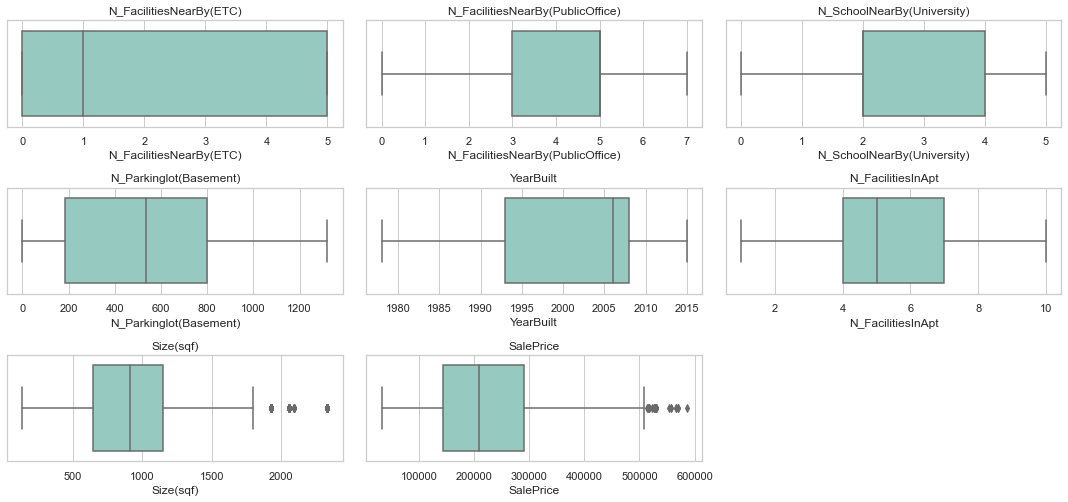

In [232]:
# Boxplot tiap fitur numerikal untuk melihat outlier
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1

for columns in numerical_columns:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=columns, data=df);
    plt.title(columns, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

Dapat dilihat, terdapat beberapa outlier pada ukuran apartemen (Size(sqf)) dan harga apartemen (SalePrice). Maka dari itu, akan di lihat terlebih dahulu apakah outlier akan mempengaruhi data terlalu besar atau tidak dengan mencari limit atas dan limit bawah boxplot terlebih dahulu

**Price**

In [233]:
# Function limit data
def limit_quantile(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}') 

In [234]:
# Outlier pada Sale Price
limit_quantile(df1['SalePrice'])

IQR: 147345.0
limit_bawah: -67478.5
limit_atas: 521901.5


In [235]:
# Outlier pada Size(sqf)
limit_quantile(df1['Size(sqf)'])

IQR: 424.0
limit_bawah: 107.0
limit_atas: 1803.0


In [236]:
# Describe untuk melihat min-max dan quantile data 'SalePrice'
df1['SalePrice'].describe()

count      2701.000000
mean     229511.365790
std      105079.891321
min       32743.000000
25%      153539.000000
50%      221238.000000
75%      300884.000000
max      585840.000000
Name: SalePrice, dtype: float64

In [237]:
# Jumlah outlier 'SalePrice' di atas limit_atas
df1[df1['SalePrice'] > 521901]['SalePrice'].count()

17

Dapat dilihat, terdapat 75% apartemen dengan harga kurang dari **₩300884**, di mana nilai maksimumnya adalah **₩585840**. Jumlah outlier pada 'SalePrice' hanya 17 data, karena itu barplot 'SalePrice' terlihat 'skewed-right', namun tidak begitu berpangaruh karena jumlah outlier jauh lebih sedikit dibanding total data yang didapat. Maka dari itu, data outlier akan tetap dimasukan untuk pemodelan.

**Size(sqf)**

In [238]:
# Describe untuk melihat min-max dan quantile data 'Size(sqf)'
df1['Size(sqf)'].describe()

count    2701.000000
mean      984.028878
std       391.982619
min       135.000000
25%       743.000000
50%       910.000000
75%      1167.000000
max      2337.000000
Name: Size(sqf), dtype: float64

In [239]:
# Jumlah outlier 'SalePrice' di atas limit_atas
df1[df1['Size(sqf)'] > 1803]['Size(sqf)'].count()

84

In [240]:
df1['Size(sqf)'].value_counts()

914     444
910     236
644     225
868     111
903      87
       ... 
163       1
281       1
736       1
1256      1
832       1
Name: Size(sqf), Length: 89, dtype: int64

In [241]:
df1_size = df1[(df1['Size(sqf)'] <= 1803)]

Text(0.5, 1.0, 'Plot Luas Apartemen Setelah Pengahapusan Outlier ')

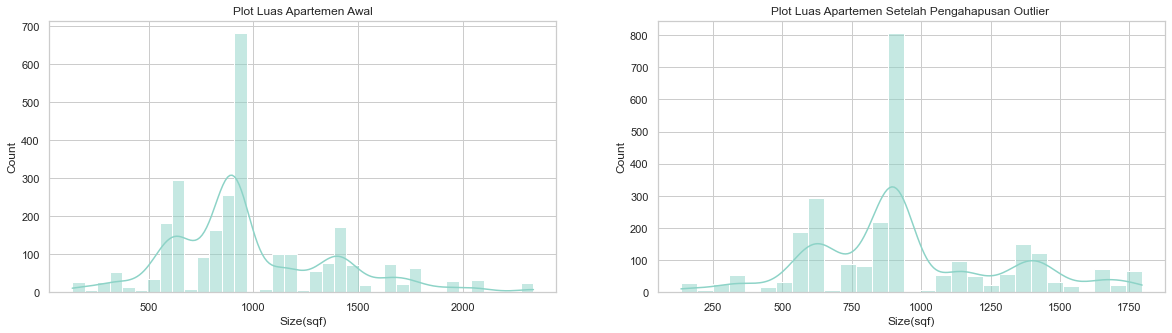

In [242]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.histplot(df1, x = 'Size(sqf)',kde = True)
plt.title('Plot Luas Apartemen Awal')

plt.subplot(1,2,2)
sns.histplot(df1_size, x = 'Size(sqf)',kde=True)
plt.title('Plot Luas Apartemen Setelah Pengahapusan Outlier ')

<AxesSubplot:xlabel='Size(sqf)'>

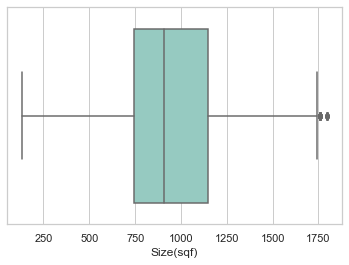

In [243]:
sns.boxplot(data = df1_size, x = 'Size(sqf)')

Ditemukan 75% apartemen memiliki luas tanah di bawah 1167 sqf, dengan nilai maksimal 2337 sqf. Terdapat 84 nilai yang lebih besar dari limit atas, maka outlier tersebut dihapus agar bentuk plot lebih terdistribusi dari sentral

In [244]:
df1_size.describe()

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice
count,2617.000000,2617.000000,2617.000000,2617.000000,2617.00000,2617.000000,2617.000000
mean,1.902178,4.043943,2.677875,527.178831,5.69316,948.352312,225281.601834
std,2.150044,1.883043,1.506288,416.659149,2.37361,341.733043,102129.386220
min,0.000000,0.000000,0.000000,0.000000,1.00000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,181.000000,4.00000,743.000000,150442.000000
50%,1.000000,4.000000,2.000000,536.000000,5.00000,910.000000,217699.000000
75%,5.000000,5.000000,4.000000,798.000000,7.00000,1149.000000,294690.000000
max,5.000000,7.000000,5.000000,1321.000000,10.00000,1796.000000,566371.000000


In [245]:
df1 = df1_size

## Dataset Bersih

In [246]:
# Cek dataset yang sudah bersih
df1.head()

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,5,1743,311504


In [247]:
# Cek kembali info dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2617 entries, 0 to 4121
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       2617 non-null   object 
 1   TimeToSubway                      2617 non-null   object 
 2   SubwayStation                     2617 non-null   object 
 3   N_FacilitiesNearBy(ETC)           2617 non-null   float64
 4   N_FacilitiesNearBy(PublicOffice)  2617 non-null   float64
 5   N_SchoolNearBy(University)        2617 non-null   float64
 6   N_Parkinglot(Basement)            2617 non-null   float64
 7   N_FacilitiesInApt                 2617 non-null   int64  
 8   Size(sqf)                         2617 non-null   int64  
 9   SalePrice                         2617 non-null   int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 289.4+ KB


In [248]:
df1.shape

(2617, 10)

In [249]:
(2617/4123)*100

63.47319912684938

Dataset bersih didapatkan setelah membuang data duplikat dan outlier ukuran apartemen sehingga tersisa **2617** baris. Artinya, tersisa 63.5% dari data awal.

# 4. Modeling

In [250]:
# Import Lib untuk modeling data
from sklearn.model_selection import train_test_split

import category_encoders as ce
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold, StratifiedKFold


from sklearn.preprocessing import PolynomialFeatures, KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from category_encoders import OrdinalEncoder, BinaryEncoder

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, confusion_matrix

from sklearn import metrics as m
from sklearn import linear_model as lm
from sklearn import model_selection as ms

### **Encoding**

Agar semua fitur dapat digunakan dalam analisis, fitur-fitur kategorikal harus diubah menjadi fitur numerikal melalui ColumnTransformer dan akan diaplikasikan melalui pipeline

In [251]:
df1['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

In [252]:
# Ordinal map

ordinal_map = [
    {'col':'TimeToSubway', 'mapping' :{'0-5min':1,'5min~10min':2, '10min~15min':3, '15min~20min':4, 'no_bus_stop_nearby': 0 , None:0}}
]

In [253]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first'), ['HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['SubwayStation']),
    ('OrdinalEncoder', OrdinalEncoder(cols=['TimeToSubway'], mapping=ordinal_map), ['TimeToSubway'])
], remainder='passthrough')

In [254]:
# Define X and y
X = df1.drop('SalePrice', axis=1)
y = df1['SalePrice'] 

In [255]:
# train dan test data
X_train, X_test, y_train, y_test = train_test_split(
                                    X,
                                    y,
                                    test_size = 0.3,
                                    random_state = 10,
                                    
)

In [257]:
# Cross validation untuk mencari model data yang paling cocok

# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
adb = AdaBoostRegressor(random_state=1)

# Scaling data
scaler = StandardScaler()

# Kandidat algoritma
models = [lr, knn, dt, rf, xgb, adb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

score_r2 = []
nilai_mean_r2 = []
nilai_std_r2 = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

    # R2
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='r2', 
        error_score='raise'
        )

    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    nilai_mean_r2.append(model_cv_r2.mean())
    nilai_std_r2.append(model_cv_r2.std())
    

[-52740.91748758 -54242.79173753 -51216.25485619 -51723.61434155
 -52676.07315673] LinearRegression()
[-42634.51411631 -44045.64814505 -41733.67619829 -42432.5166856
 -42798.26782152] LinearRegression()
[-0.21445962 -0.24795148 -0.22365961 -0.24407081 -0.22392453] LinearRegression()
[0.72880479 0.71542155 0.74909146 0.74162898 0.73678924] LinearRegression()
[-52467.55723344 -54336.94003888 -50173.90825618 -48914.91285298
 -48053.97059867] KNeighborsRegressor()
[-38484.86430518 -42552.33005464 -39755.94808743 -40216.32185792
 -37484.63224044] KNeighborsRegressor()
[-0.19809107 -0.23422456 -0.21073453 -0.22862877 -0.20527321] KNeighborsRegressor()
[0.73160876 0.71443282 0.75920045 0.7689273  0.78095395] KNeighborsRegressor()
[-50554.72423847 -49822.06342617 -47762.97008884 -46948.43020827
 -45134.34140324] DecisionTreeRegressor(random_state=1)
[-36823.43019124 -39028.8370304  -38519.02413909 -38723.80511036
 -35909.79710222] DecisionTreeRegressor(random_state=1)
[-0.1891232  -0.21137759 

In [263]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor','AdaBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
    'Mean_R2_Score': nilai_mean_r2,
    'Std_R2_Score': nilai_std_r2
}).sort_values('Mean_RMSE',ascending=False)

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE,Mean_R2_Score,Std_R2_Score
3,RandomForest Regressor,-47923.871017,1797.141922,-37821.813768,1251.528855,-0.201278,0.009972,0.778475,0.018288
2,DecisionTree Regressor,-48044.505873,1960.133087,-37800.978715,1217.128000,-0.201411,0.009353,0.777284,0.019941
4,XGBoost Regressor,-48052.113329,1962.294089,-37815.146037,1229.172519,-0.201441,0.009419,0.777214,0.019949
1,KNN Regressor,-50789.457796,2314.145984,-39698.819309,1719.878326,-0.215390,0.013808,0.751025,0.024491
0,Linear Regression,-52519.930316,1036.837136,-42728.924593,751.779189,-0.230813,0.012927,0.734347,0.011535
5,AdaBoost Regressor,-54551.364486,1319.372829,-45026.605808,863.552812,-0.248189,0.014984,0.713249,0.016440


Terdapat perbedaan signifikan antara nilai RMSE dan MAE. Besar nilai RMSE dikarenakan nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan sehingga RMSE memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Artinya, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE dan R2 Score, ditemukan RandomForest. Sedangkan dari nilai MAE dan MAPE, model dengan nilai yang paling mendekati 0 adalah DecisionTree. Ke-2 nilai memiliki perbedaan yang sangat tipis.
- Langkah selanjutnya adalah melakukan prediksi pada test set dengan 2 benchmark model terbaik, yakni DecisionTree dan RandomForest.

### Prediction to test set

Prediksi dilakukan menggunakan DecisionTree dan RandomForest sebagai model terbaik

In [264]:
# Benchmark 2 model terbaik
models = {
    'DecisionTree': DecisionTreeRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
DecisionTree,45388.814347,36475.069895,0.182873
RandomForest,45377.683769,36474.934641,0.182871


- Ketika dilakukan prediksi pada test set, performa RandomForest secara akumulatif sedikit lebih baik. Hal ini dapat dilihat dari nilai RMSE dan MAPE yang sedikit lebih rendah dari DecisionTree

### Hyperparameter Tuning

Model RandomForest akan digunkan sebagai model akhir terbagus. Selanjutnya, akan dilakukan hyperparameter tuning pada model untuk mencoba meningkatkan performa model

In [265]:
?RandomForestRegressor

Init signature:
RandomForestRegressor(
    n_estimators=100,
    *,
    criterion='squared_error',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=1.0,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None,
)
Docstring:     
A random forest regressor.

A random forest is a meta estimator that fits a number of classifying
decision trees on various sub-samples of the dataset and uses averaging
to improve the predictive accuracy and control over-fitting.
The sub-sample size is controlled with the `max_samples` parameter if
`bootstrap=True` (default), otherwise the whole dataset is used to build
each tree.

Read more in the :ref:`User Guide <forest>`.

Parameters
----------
n_estimators : int, default=100
    The number of trees in the forest.

    .. versioncha

In [266]:
# Jumlah Pohon
n_estimators = list(np.arange(1,201))

# Maks kedalaman pohon
max_depth = list(np.arange(1,10))

# Min sample split
min_samples_split = list(np.arange(100,201))

# Min sample leaf
min_samples_leaf = list(np.arange(100,201))

hyperparam_space_rf = {
    'model__max_depth': max_depth,
    'model__n_estimators': n_estimators,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf
}

In [267]:
# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [268]:
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['SubwayStation']),
                                                                              ('OrdinalEncoder',
                                                                               OrdinalEncoder(cols=['TimeToSubway'],
                                                                                              mapping=[{'col': 'TimeToSub...
                                                                     108, 109,
                                                                     110, 111,
                                                                     112, 113,
                                                                     114, 115,
                                                                     116, 117,
                                                                     118, 119,
                                                                     120, 121,
                                                                     122, 123,
                                                                     124, 125,
                                                                     126, 127,
                                                                     128, 129, ...],
                                        'model__n_estimators': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [269]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_depth,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
84,1.127076,0.152606,0.078539,0.009717,185,131,100,6,"{'model__n_estimators': 185, 'model__min_sampl...",-58138.146494,...,795.554087,1,-0.240424,-0.274387,-0.251063,-0.279142,-0.238276,-0.256659,0.017045,1
29,0.571405,0.062694,0.059670,0.011733,106,123,103,5,"{'model__n_estimators': 106, 'model__min_sampl...",-59067.962292,...,832.718784,2,-0.245962,-0.277295,-0.254594,-0.280936,-0.240466,-0.259850,0.016402,3
56,0.138696,0.040632,0.026568,0.005658,10,105,101,9,"{'model__n_estimators': 10, 'model__min_sample...",-58345.553825,...,1338.878505,3,-0.238536,-0.278053,-0.255510,-0.279958,-0.241410,-0.258693,0.017562,2
2,0.920685,0.124913,0.077520,0.020814,161,119,104,7,"{'model__n_estimators': 161, 'model__min_sampl...",-59337.046646,...,798.875350,5,-0.247404,-0.278434,-0.255403,-0.281713,-0.240980,-0.260787,0.016430,5
96,0.923777,0.149155,0.077699,0.038851,152,129,104,7,"{'model__n_estimators': 152, 'model__min_sampl...",-59354.876662,...,804.486484,4,-0.247393,-0.278523,-0.255398,-0.281585,-0.241031,-0.260786,0.016406,4


In [270]:
random_rf.best_params_

{'model__n_estimators': 185,
 'model__min_samples_split': 131,
 'model__min_samples_leaf': 100,
 'model__max_depth': 6}

In [271]:
random_rf.best_score_

-56990.01290069369

In [272]:
# Model rfoost
model = {'RandomForest': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,54394.248119,43090.832745,0.224209


In [273]:
score_before_tuning.iloc[1].to_frame().T

,RMSE,MAE,MAPE
RandomForest,45377.683769,36474.934641,0.182871


In [274]:
score_after_tuning

,RMSE,MAE,MAPE
RandomForest,54394.248119,43090.832745,0.224209


In [280]:
# Perbandingan RMSE, MAE, dan MAPE sebelum dan sesudah tuning
print('Before Tuning \n',score_before_tuning.iloc[1].to_frame().T,'\n')


print('After Tuning \n',score_after_tuning)

Before Tuning 
                       RMSE           MAE      MAPE
RandomForest  45377.683769  36474.934641  0.182871 

After Tuning 
                       RMSE           MAE      MAPE
RandomForest  54394.248119  43090.832745  0.224209


Setelah dituning, dapat dilihat ternyata nilainya semakin buruk, maka dari itu akan digunakan prediction sebelum tuning

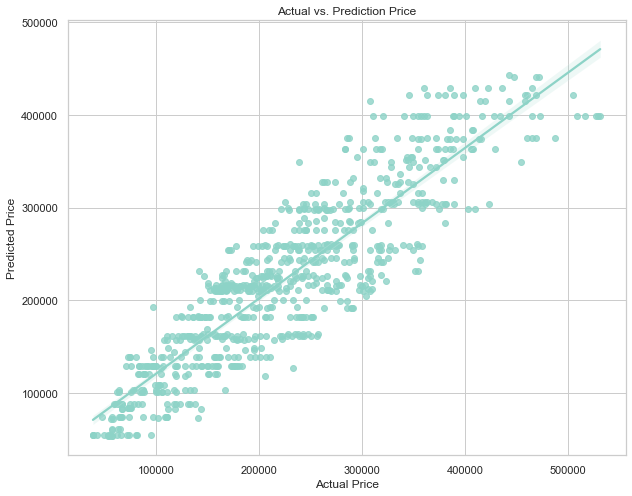

In [288]:
# Plot harga aktual dengan harga prediksi
plt.figure(figsize=(10, 8))
plot = sns.regplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price'
                                               );

Pada dasarnya, terdapat perbedaan yang cukup mencolok antara harga prediksi dengan harga aktual, namun secara mayoritas, perbedaan antara harga prediksi dengan harga aktual mendekati slope yang terdapa dalam plot. Ini dimungkinkan karena telah dilakukan penghapusan outlier pada kolom 'Size(sqf)'. 

**Feature Importance**

Function Feature_importances_ akan digunakan untuk mencari tahu fitur mana yang paling mempengaruhi target.

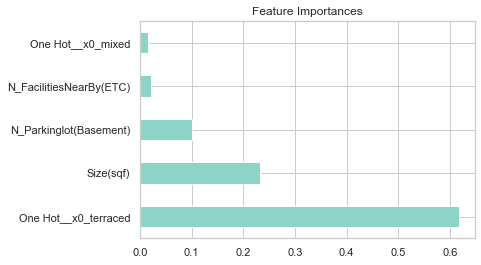

In [277]:
# Plot feature importances
feature_imp = pd.Series(rf_tuning['model'].feature_importances_, transformer.get_feature_names()).sort_values(ascending = False).head()
feature_imp.plot(kind='barh', title='Feature Importances');

Dari hasil modeling, dapat dilihat fitur 'HallwayType' dan 'Size(sqf)' adalah fitur yang paling mempengaruhi 'SalePrice'.

# 5. Conclusion

Kita menggunakan metrik evaluasi RMSE, MAE, MAPE, dan R2 Score. Dari nilai RMSE yang didapat sebelum tuning, yakni ₩ 45377.68 , dapat disimpulkan jika model ini digunakan untuk memprediksi harga pasaran apartemen di Daegu, pada rentang nilai yang didapat(maks = ₩ 521901.5) , maka akan ada perbedaan prediksi dengan data aktual sebesar ± ₩ 45377.68. Namun ini tidak berarti error lebih dari perkiraan tidak akan terjadi, terutama karena telah dilakukan penghapusan outlier pada kolom 'Size(sqf)' dan kurangnya fitur seperti detail pada jenis fasilitas dan kualitas fasilitas tersebut.

# 6. Recommendation

Beberapa hal yang dapat dilakukan agar mendapatkan model yang lebih baik adalah:

1. Menambah fitur yang lebih korelatif terhadap target('SalePrice') seperti detail fasilitas apa saja yang tersedia dan menambahkan jumlah data yang didapat.

2. Melihat prediksi mana saja yang memiliki nilai error yang tinggi. Error tersebut dapat dikelompokkan ke dalam grup overestimation dan underestimation, lalu 5% error paling ekstrim dipilih dari tiap grup untuk dibuat 3 pengelompokkan grup, yaitu overestimation (5%), underestimation (5%), dan grup mayoritas yang error-nya mendekati nilai mean (90%). Setelahnya kita bisa mengecek hubungan antara error tersebut dengan tiap variabel independen. Pada akhirnya kita dapat mengetahui sebenarnya variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi, sehingga kita bisa melakukan training ulang dengan penerapan feature engineering lainnya.


## Save Model

In [278]:
import pickle

In [279]:
pickle.dump(rf_tuning, open('model_RandForest','wb'))